In [16]:
import numpy as np
import scipy as sp
import arviz as az
from src.baseSIR import mle
from src.baseSIR import mle_sir
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import time

In [17]:
N_sample = 5
R0 = 3
g_state =  ["fixed","free"]
sim_g = g_state[0]
extra = ["","_I1","_I2"]
I0 = extra[1]

In [18]:
N_10_b = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/{sim_g}_g_N_10{I0}_b_{R0}.csv", delimiter= ",")
N_100_b = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/{sim_g}_g_N_100{I0}_b_{R0}.csv", delimiter= ",")
N_1000_b = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/{sim_g}_g_N_1000{I0}_b_{R0}.csv", delimiter= ",")

if sim_g == "free":
    N_10_g = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/{sim_g}_g_N_10{I0}_g_{R0}.csv", delimiter= ",")
    N_100_g = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/{sim_g}_g_N_100{I0}_g_{R0}.csv", delimiter= ",")
    N_1000_g = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/{sim_g}_g_N_1000{I0}_g_{R0}.csv", delimiter= ",")

In [19]:
plot_traj_b = np.empty(shape=(N_sample,4))
plot_traj_g = np.empty(shape=(N_sample,4))
box_b = np.empty(shape= (N_sample*3,2))
box_g = np.empty(shape= (N_sample*3,2))

for i in range(N_sample):
    plot_traj_b[i,0] = i +1
    plot_traj_b[i,1] = N_10_b[:,0][i]
    plot_traj_b[i,2] = N_100_b[:,0][i]
    plot_traj_b[i,3] = N_1000_b[:,0][i]

    if sim_g == "free":
        plot_traj_g[i,0] = i +1
        plot_traj_g[i,1] = N_10_g[:,0][i]
        plot_traj_g[i,2] = N_100_g[:,0][i]
        plot_traj_g[i,3] = N_1000_g[:,0][i]

for j in range(N_sample*3):
    if j < N_sample:
        box_b[j,0] = N_10_b[:,0][j]
        box_b[j,1] = "10"
        if sim_g == "free":
            box_g[j,0] = N_10_g[:,0][j]
            box_g[j,1] = "10"
    elif N_sample <= j < N_sample*2:
        box_b[j,0] = N_100_b[:,0][j-N_sample]
        box_b[j,1] = "100"
        if sim_g == "free":
            box_g[j,0] = N_100_g[:,0][j-N_sample]
            box_g[j,1] = "100"
    else:
        box_b[j,0] = N_1000_b[:,0][j-N_sample*2]
        box_b[j,1] = "1000"
        if sim_g == "free":
            box_g[j,0] = N_1000_g[:,0][j-N_sample*2]
            box_g[j,1] = "1000"

In [20]:
mle_b = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/MLE_b_{R0}.csv", delimiter=",")[0:N_sample]
mle_g = np.genfromtxt(f"../../Data/R0_{R0}/Fitted/MLE_g_{R0}.csv", delimiter=",")[0:N_sample]

In [21]:
test_b = N_1000_b[:,0]
if sim_g == "free":
    test_g = N_1000_g[:,0]

In [22]:
print(sp.stats.ttest_rel(mle_b,test_b))
if sim_g == "free":
    print(sp.stats.ttest_rel(mle_g,test_g))

TtestResult(statistic=-0.19314916836543172, pvalue=0.8562531036498269, df=4)


In [23]:
mle_N = ["MLE_1000"]*N_sample
mle_B = {"b":mle_b,"N":mle_N}
df_mle_b = pd.DataFrame(mle_B, columns=("b","N"))
mle_G = {"g":mle_g,"N":mle_N}
df_mle_g = pd.DataFrame(mle_G, columns=("g","N"))

In [24]:
df_b = pd.DataFrame(box_b)
df_g =pd.DataFrame(box_g)
df_b.columns = ["b","N"]
df_g.columns = ["g","N"]
df_b = pd.concat([df_b,df_mle_b])
df_g = pd.concat([df_g,df_mle_g])

<Axes: xlabel='N', ylabel='b'>

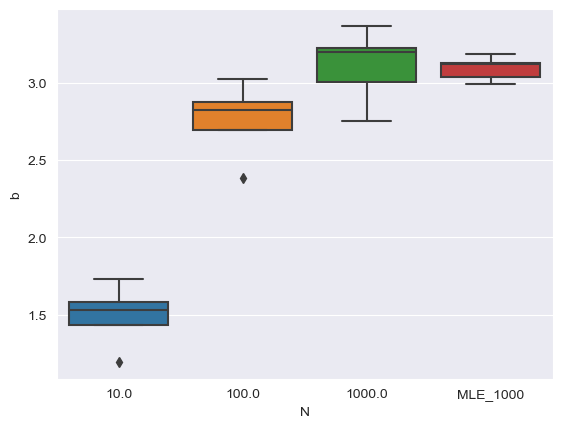

In [25]:
sns.boxplot(df_b,x="N",y="b")

In [26]:
if sim_g == "free":
    sns.boxplot(df_g,x="N",y="g")

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

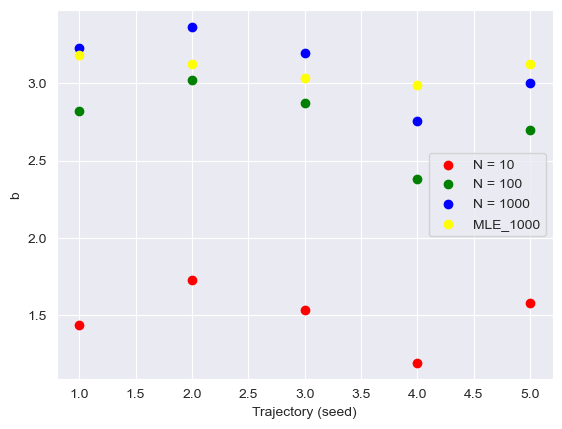

In [27]:
fig, ax0 = plt.subplots()
ax0.scatter(plot_traj_b[:,0],plot_traj_b[:,1], color = "red", label = "N = 10")
ax0.scatter(plot_traj_b[:,0],plot_traj_b[:,2], color = "green", label = "N = 100")
ax0.scatter(plot_traj_b[:,0],plot_traj_b[:,3], color = "blue", label = "N = 1000")
ax0.scatter(plot_traj_b[:,0],mle_b, color = "yellow", label = "MLE_1000")
ax0.set_xlabel("Trajectory (seed)")
ax0.set_ylabel("b")
ax0.legend()
fig.show

In [28]:
if sim_g == "free":
    fig, ax0 = plt.subplots()
    ax0.scatter(plot_traj_g[:, 0], plot_traj_g[:, 1], color="red", label="N = 10")
    ax0.scatter(plot_traj_g[:, 0], plot_traj_g[:, 2], color="green", label="N = 100")
    ax0.scatter(plot_traj_g[:, 0], plot_traj_g[:, 3], color="blue", label="N = 1000")
    ax0.scatter(plot_traj_g[:,0],mle_g, color = "yellow", label = "MLE_1000")
    ax0.set_xlabel("Trajectory (seed)")
    ax0.set_ylabel("g")
    ax0.legend()
    fig.show()

In [29]:
differences_b = plot_traj_b[:,3] - mle_b
if sim_g == "free":
    differences_g = plot_traj_g[:,3] - mle_g
zero = [0]*N_sample

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

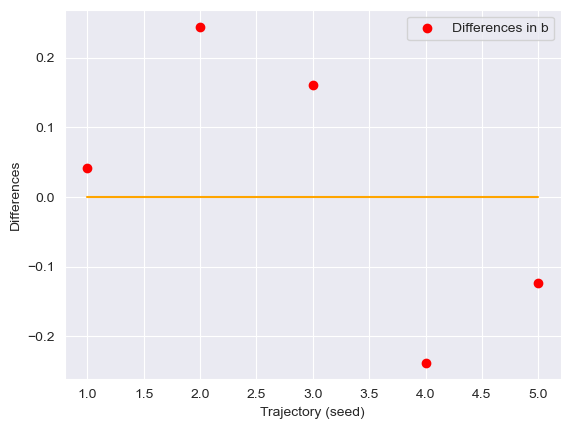

In [30]:
fig, ax0 = plt.subplots()
ax0.scatter(plot_traj_b[:,0],differences_b, color = "red", label = "Differences in b")
if sim_g == "free":
    ax0.scatter(plot_traj_b[:,0],differences_g, color = "green", label = "Differences in g")
ax0.plot(plot_traj_b[:,0],zero, color = "orange")
ax0.set_xlabel("Trajectory (seed)")
ax0.set_ylabel("Differences")
ax0.legend()
fig.show